In [1]:
import numpy as np
import matplotlib.pyplot as plt
from galpy.orbit import Orbit
import astropy.units as u
import pandas as pd
import os

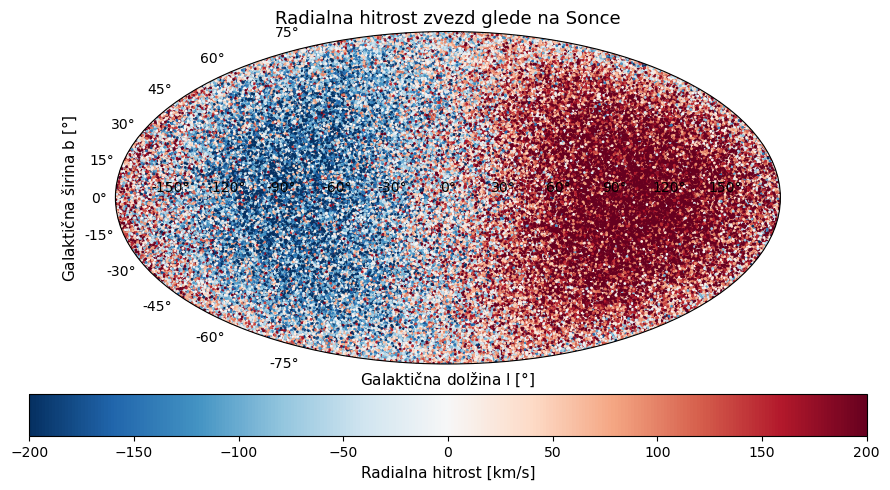

In [6]:
path = os.getcwd()

data = 'heliocentric_data.txt'

# --- 1️⃣ Load the saved data ---
# File format: l_deg  b_deg  v_rad_km_per_s
data = np.loadtxt("heliocentric_data.txt", skiprows=1)
l_deg, b_deg, v_rad = data.T

# --- 2️⃣ Convert to radians for Mollweide projection ---
l_rad = np.radians(-l_deg)
b_rad = np.radians(b_deg)

# Wrap longitude to [-180°, +180°]
l_rad = (l_rad + np.pi) % (2 * np.pi) - np.pi

# --- 3️⃣ Plot the data ---
plt.figure(figsize=(9, 5))
ax = plt.subplot(111, projection="mollweide")

sc = ax.scatter(l_rad, b_rad, c=v_rad, cmap='RdBu_r', s=1,
                vmin=-200, vmax=200)

# Slovenian labels and title
ax.set_xlabel(r"Galaktična dolžina l [$\degree$]", fontsize=11)
ax.set_ylabel(r"Galaktična širina b [$\degree$]", fontsize=11)
ax.set_title("Radialna hitrost zvezd glede na Sonce", fontsize=13)

# Colorbar
cb = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.07)
cb.set_label("Radialna hitrost [km/s]", fontsize=11)

plt.tight_layout()
plt.show()

Creating binned mean-velocity map...


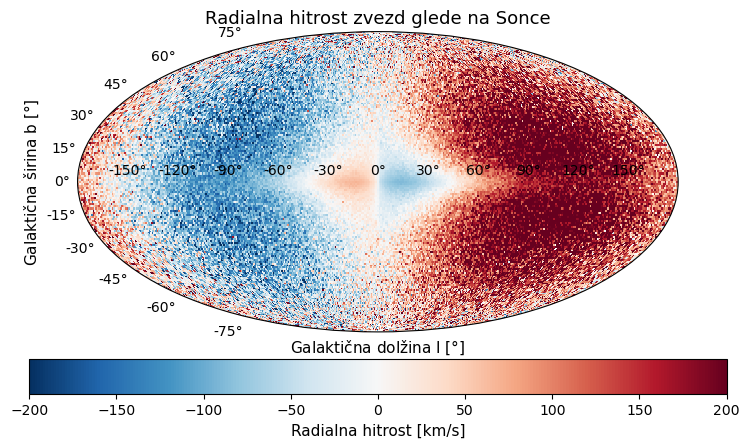


All tasks complete.


In [5]:
from scipy.stats import binned_statistic_2d
path = os.getcwd()

data = 'heliocentric_data.txt'

# --- 1️⃣ Load the saved data ---
# File format: l_deg  b_deg  v_rad_km_per_s
data = np.loadtxt("heliocentric_data.txt", skiprows=1)
l_deg, b_deg, v_rad = data.T
l_plot = np.radians(-l_deg)
l_rad = np.radians(l_deg)
b_rad = np.radians(b_deg)
print("Creating binned mean-velocity map...")

NBINS_L = 360  # Number of bins in longitude
NBINS_B = 180  # Number of bins in latitude
l_bins = np.linspace(-np.pi, np.pi, NBINS_L)
b_bins = np.linspace(-np.pi/2, np.pi/2, NBINS_B)

mean_vrad_map, _, _, _ = binned_statistic_2d(
    l_plot, b_rad, v_rad,
    statistic='mean',
    bins=[l_bins, b_bins]
)

L_GRID, B_GRID = np.meshgrid(l_bins, b_bins)

plt.figure(figsize=(9, 5))
ax = plt.subplot(111, projection="mollweide")

# Plot the 2D map. cmap='RdBu' matches the PDF caption:
# Red=receding (+v), Blue=approaching (-v)

im = ax.pcolormesh(L_GRID, B_GRID, mean_vrad_map.T,
                   cmap='RdBu_r', vmin=-200, vmax=200)

cb = plt.colorbar(im, orientation='horizontal', pad=0.07)
cb.set_label("Radialna hitrost [km/s]", fontsize=11)

ax.set_xlabel(r"Galaktična dolžina l [$\degree$]", fontsize=11)
ax.set_ylabel(r"Galaktična širina b [$\degree$]", fontsize=11)
ax.set_title("Radialna hitrost zvezd glede na Sonce", fontsize=13)


plt.show()

print("\nAll tasks complete.")